In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
labels=["Speech","Music","Silence","Siren","Vehicle","Wind"]

vggish/embedding:0
vggish/embedding:0
Using cuda device


vggish/embedding:0
C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347
Epoch 1/100
train Loss: 1.753138 Acc: 0.355169
valid Loss: 1.715840 Acc: 0.536909
Epoch 2/100
train Loss: 1.721520 Acc: 0.522876
valid Loss: 1.685165 Acc: 0.573818
Epoch 3/100
train Loss: 1.709668 Acc: 0.5

valid Loss: 1.568804 Acc: 0.672434
Epoch 91/100
train Loss: 1.666617 Acc: 0.700683
valid Loss: 1.568678 Acc: 0.673010
Epoch 92/100
train Loss: 1.666577 Acc: 0.696078
valid Loss: 1.568531 Acc: 0.673010
Epoch 93/100
train Loss: 1.665743 Acc: 0.695633
valid Loss: 1.568333 Acc: 0.672434
Epoch 94/100
train Loss: 1.666478 Acc: 0.694593
valid Loss: 1.568174 Acc: 0.672434
Epoch 95/100
train Loss: 1.666393 Acc: 0.698010
valid Loss: 1.568040 Acc: 0.671857
Epoch 96/100
train Loss: 1.667216 Acc: 0.696376
valid Loss: 1.567927 Acc: 0.673010
Epoch 97/100
train Loss: 1.666210 Acc: 0.697267
valid Loss: 1.567781 Acc: 0.673010
Epoch 98/100
train Loss: 1.666688 Acc: 0.695187
valid Loss: 1.567618 Acc: 0.673587
Epoch 99/100
train Loss: 1.666177 Acc: 0.694444
valid Loss: 1.567469 Acc: 0.673587
Epoch 100/100
train Loss: 1.666315 Acc: 0.695781
valid Loss: 1.567315 Acc: 0.673010


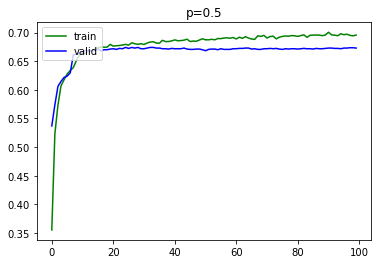

In [2]:

mymodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.50),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict=get_dataloader_dict(labels,datatype="train")
mymodel.train(dataloader_dict,_print=True,_num_epochs=100)
mymodel.graph("p=0.5")

In [14]:

dataloader_dict=get_dataloader_dict(labels,datatype="eval")
def eval(tr,dataloader_dict,labels):
    model=tr.model
    inputs,la = iter(dataloader_dict["train"]).__next__()
    model.eval()

    output = model(inputs)
    for h in range(len(output)):
        print("模範解答",labels[la[h].item()])
        ans=[[labels[i],output[h][i].item()] for i in range(len(labels))]
        ans.sort(key=lambda x: x[1],reverse=True)
        [print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
        print("----------------")

def eval2(tr,dataloader_dict,labels):
    model=tr.model
    acc=0
    count=0.0
    for inputs,la in dataloader_dict["train"]:

        model.eval()

        output = model(inputs)
        for h in range(len(output)):
            #print("模範解答",labels[la[h].item()])
            ans=[[i,output[h][i].item()] for i in range(len(labels))]
            ans.sort(key=lambda x: x[1],reverse=True)
            acc+=1 if (ans[0][0]==la[h])else 0
            count+=1
            #[print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
            #print("----------------")
    print("正解数/入力数:{}/{:.0f}".format(acc,count))
    print("正解率:{:.3f}".format(acc/count))
#eval(mymodel,dataloader_dict,labels)        
eval2(mymodel,dataloader_dict,labels)


C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：75
valid用データの数：42
正解数/入力数:483/743
正解率:0.650


In [2]:
#これを保存した
mymodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.30),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict=get_dataloader_dict(labels,datatype="train")



vggish/embedding:0
C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347


Epoch 1/50
train Loss: 1.752568 Acc: 0.478015
valid Loss: 1.715740 Acc: 0.511534
Epoch 2/50
train Loss: 1.712717 Acc: 0.534017
valid Loss: 1.683888 Acc: 0.543829
Epoch 3/50
train Loss: 1.695111 Acc: 0.578877
valid Loss: 1.666329 Acc: 0.589389
Epoch 4/50
train Loss: 1.685585 Acc: 0.610517
valid Loss: 1.654413 Acc: 0.607266
Epoch 5/50
train Loss: 1.678640 Acc: 0.644534
valid Loss: 1.645637 Acc: 0.649366
Epoch 6/50
train Loss: 1.673919 Acc: 0.664439
valid Loss: 1.638961 Acc: 0.653979
Epoch 7/50
train Loss: 1.669522 Acc: 0.671420
valid Loss: 1.633370 Acc: 0.658016
Epoch 8/50
train Loss: 1.665605 Acc: 0.673797
valid Loss: 1.628533 Acc: 0.660323
Epoch 9/50
train Loss: 1.662508 Acc: 0.674985
valid Loss: 1.624388 Acc: 0.662053
Epoch 10/50
train Loss: 1.660635 Acc: 0.678847
valid Loss: 1.620816 Acc: 0.663206
Epoch 11/50
train Loss: 1.658154 Acc: 0.680036
valid Loss: 1.617692 Acc: 0.665513
Epoch 12/50
train Loss: 1.656309 Acc: 0.682561
valid Loss: 1.614945 Acc: 0.667820
Epoch 13/50
train Loss: 1

C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hase\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31227 missing from current

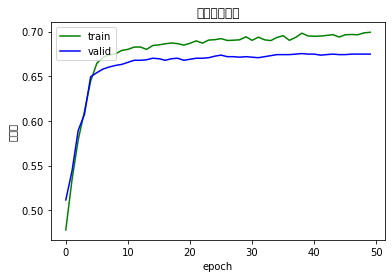

AttributeError: 'float' object has no attribute 'tolist'

In [3]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
mymodel.graph()

In [3]:
#hozon
import joblib
joblib.dump(mymodel,"tyuukannyou.jb", compress=3)

['tyuukannyou.jb']

In [3]:
#よみこみ
import joblib
dataloader_dict=joblib.load("tyuukannyou.jb")